<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.282704,5.587210,55.869914,50.557307,5.312607
1,0.0,1.0,25.352076,-7.436050,27.916026,35.598246,-7.682220
2,0.0,2.0,83.794563,-15.629769,78.164794,94.152030,-15.987235
3,0.0,3.0,30.884318,-1.789198,39.095120,41.141023,-2.045903
4,0.0,4.0,37.809743,-2.988535,44.821208,48.079637,-3.258429
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.641029,4.962001,80.603030,75.593547,5.009483
249996,999.0,246.0,77.316660,2.785881,90.102541,87.222874,2.879667
249997,999.0,247.0,37.558024,-8.675579,38.882445,47.621914,-8.739469
249998,999.0,248.0,90.211241,2.761429,102.972670,100.066318,2.906352


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.282704,5.587210,55.869914,50.557307,5.312607
1,0.0,1.0,25.352076,-7.436050,27.916026,35.598246,-7.682220
2,0.0,2.0,83.794563,-15.629769,78.164794,94.152030,-15.987235
3,0.0,3.0,30.884318,-1.789198,39.095120,41.141023,-2.045903
4,0.0,4.0,37.809743,-2.988535,44.821208,48.079637,-3.258429
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.641029,4.962001,80.603030,75.593547,5.009483
249996,999.0,246.0,77.316660,2.785881,90.102541,87.222874,2.879667
249997,999.0,247.0,37.558024,-8.675579,38.882445,47.621914,-8.739469
249998,999.0,248.0,90.211241,2.761429,102.972670,100.066318,2.906352


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    40.282704   5.587210   55.869914   50.557307   5.312607
      1.0    25.352076  -7.436050   27.916026   35.598246  -7.682220
      2.0    83.794563 -15.629769   78.164794   94.152030 -15.987235
      3.0    30.884318  -1.789198   39.095120   41.141023  -2.045903
      4.0    37.809743  -2.988535   44.821208   48.079637  -3.258429
...                ...        ...         ...         ...        ...
999.0 245.0  65.641029   4.962001   80.603030   75.593547   5.009483
      246.0  77.316660   2.785881   90.102541   87.222874   2.879667
      247.0  37.558024  -8.675579   38.882445   47.621914  -8.739469
      248.0  90.211241   2.761429  102.972670  100.066318   2.906352
      249.0  65.518651  -3.805376   71.713275   75.471654  -3.758379

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    40.282704   5.587210   55.869914   50.557307   5.312607
      1.0    25.352076  -7.436050   27.916026   35.598246  -7.682220
      2.0    83.794563 -15.629769   78.164794   94.152030 -15.987235
      3.0    30.884318  -1.789198   39.095120   41.141023  -2.045903
      4.0    37.809743  -2.988535   44.821208   48.079637  -3.258429
...                ...        ...         ...         ...        ...
999.0 245.0  65.641029   4.962001   80.603030   75.593547   5.009483
      246.0  77.316660   2.785881   90.102541   87.222874   2.879667
      247.0  37.558024  -8.675579   38.882445   47.621914  -8.739469
      248.0  90.211241   2.761429  102.972670  100.066318   2.906352
      249.0  65.518651  -3.805376   71.713275   75.471654  -3.758379

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.282704,5.587210,55.869914,50.557307,5.312607
1,0.0,1.0,25.352076,-7.436050,27.916026,35.598246,-7.682220
2,0.0,2.0,83.794563,-15.629769,78.164794,94.152030,-15.987235
3,0.0,3.0,30.884318,-1.789198,39.095120,41.141023,-2.045903
4,0.0,4.0,37.809743,-2.988535,44.821208,48.079637,-3.258429
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.641029,4.962001,80.603030,75.593547,5.009483
249996,999.0,246.0,77.316660,2.785881,90.102541,87.222874,2.879667
249997,999.0,247.0,37.558024,-8.675579,38.882445,47.621914,-8.739469
249998,999.0,248.0,90.211241,2.761429,102.972670,100.066318,2.906352


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    40.282704   5.587210   55.869914   50.557307   5.312607
      1.0    25.352076  -7.436050   27.916026   35.598246  -7.682220
      2.0    83.794563 -15.629769   78.164794   94.152030 -15.987235
      3.0    30.884318  -1.789198   39.095120   41.141023  -2.045903
      4.0    37.809743  -2.988535   44.821208   48.079637  -3.258429
...                ...        ...         ...         ...        ...
999.0 245.0  65.641029   4.962001   80.603030   75.593547   5.009483
      246.0  77.316660   2.785881   90.102541   87.222874   2.879667
      247.0  37.558024  -8.675579   38.882445   47.621914  -8.739469
      248.0  90.211241   2.761429  102.972670  100.066318   2.906352
      249.0  65.518651  -3.805376   71.713275   75.471654  -3.758379

[250000 rows x 5 columns]

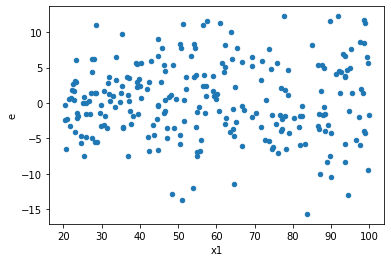

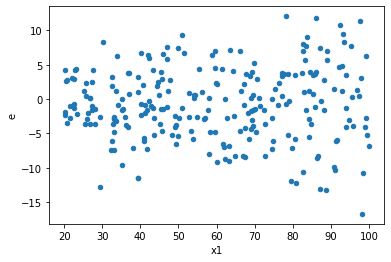

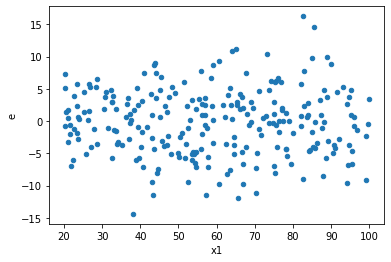

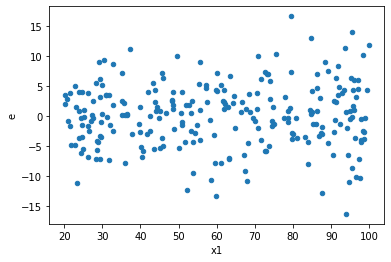

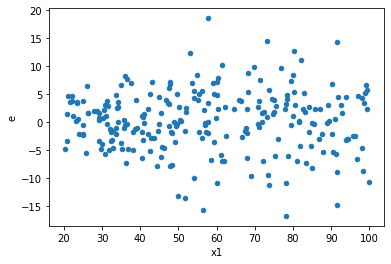

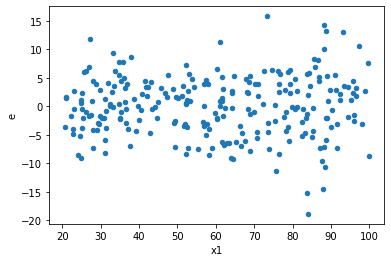

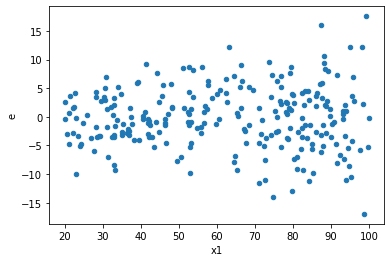

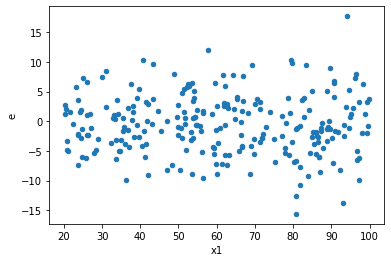

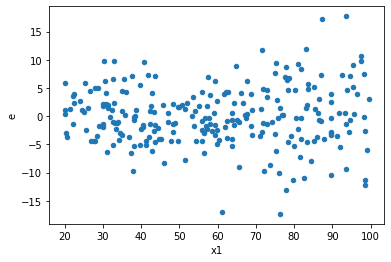

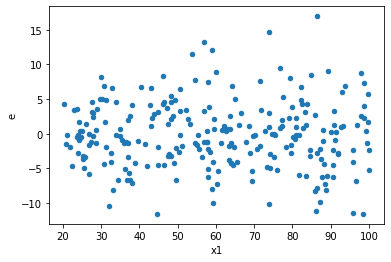

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,1502.9144225444543,3390.266339520243,15.180953763075296,34.24511454060852,2.2557946671244773,6.79432806187652e-05,0.9999660283596906,3.39716403093826e-05,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,1780.5164536589582,3650.684588699431,17.98501468342382,36.87560190605486,2.0503515040241727,0.00042196799831084597,0.9997890160008446,0.00021098399915542299,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,2057.936277279116,2771.937047994312,20.787235124031476,27.999364121154663,1.3469498927630577,0.14013174822235053,0.9299341258888247,0.07006587411117526,Reject001=1 : Homoscedasticity
3.0,99.0,99.0,1907.0446452406306,3435.265891078274,19.263077224652836,34.69965546543711,1.801355778246509,0.003732327784186751,0.9981338361079066,0.0018661638920933754,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,1524.566946511389,3495.3259126768858,15.399666126377667,35.30632235027157,2.292668039717844,4.893623308532824e-05,0.9999755318834573,2.446811654266412e-05,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,1750.016095099878,3826.985661988878,17.67693025353412,38.65642082817048,2.186828837005903,0.00012552991971603866,0.999937235040142,6.276495985801933e-05,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,1639.5449491804427,3970.62745769303,16.561060092731744,40.107348057505355,2.4217862765383913,1.5540723269813483e-05,0.9999922296383651,7.770361634906742e-06,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,1959.1162351025034,3041.2277349736896,19.789052879823267,30.71947207044131,1.552346757421756,0.029733433182496327,0.9851332834087518,0.014866716591248164,Reject001=1 : Homoscedasticity
8.0,99.0,99.0,1574.504838341103,4191.9515247184745,15.904089276172758,42.342944694126004,2.6623935491586743,1.8664514056521142e-06,0.9999990667742972,9.332257028260571e-07,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,1502.9144225444543,3390.266339520243,15.180953763075296,34.24511454060852,2.2557946671244773,6.79432806187652e-05,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,1780.5164536589582,3650.684588699431,17.98501468342382,36.87560190605486,2.0503515040241727,0.00042196799831084597,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,2057.936277279116,2771.937047994312,20.787235124031476,27.999364121154663,1.3469498927630577,0.14013174822235053,Reject001=1 : Homoscedasticity
3.0,99.0,99.0,1907.0446452406306,3435.265891078274,19.263077224652836,34.69965546543711,1.801355778246509,0.003732327784186751,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,1524.566946511389,3495.3259126768858,15.399666126377667,35.30632235027157,2.292668039717844,4.893623308532824e-05,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,1750.016095099878,3826.985661988878,17.67693025353412,38.65642082817048,2.186828837005903,0.00012552991971603866,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,1639.5449491804427,3970.62745769303,16.561060092731744,40.107348057505355,2.4217862765383913,1.5540723269813483e-05,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,1959.1162351025034,3041.2277349736896,19.789052879823267,30.71947207044131,1.552346757421756,0.029733433182496327,Reject001=1 : Homoscedasticity
8.0,99.0,99.0,1574.504838341103,4191.9515247184745,15.904089276172758,42.342944694126004,2.6623935491586743,1.8664514056521142e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    785
Reject001=1 : Homoscedasticity      215
Name: Result_test, dtype: int64